In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url_LondonHousePrices= "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)
properties_T = properties.T
properties_T = properties_T.reset_index()

In [2]:
properties_T.columns = properties_T.iloc[0]
properties_T = properties_T.drop(0)
properties_T = properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})
clean_properties = pd.melt(properties_T, id_vars= ['London_Borough', 'ID'])
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})

In [3]:
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 37'].head()
NaNFreeDF = clean_properties.dropna()
NaNFreeDF['London_Borough'].unique()
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

Text(0, 0.5, 'Price')

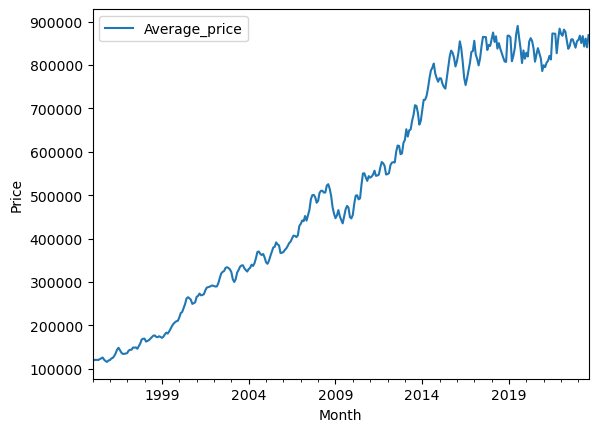

In [4]:
NaNFreeDF[NaNFreeDF.London_Borough.isin(nonBoroughs)]
df = NaNFreeDF
camden_prices = df[df['London_Borough']=='Camden']
ax = camden_prices.plot(kind='line',x = 'Month', y='Average_price')
ax.set_ylabel('Price')

In [5]:
df['Year']= df['Month'].apply(lambda t: t.year)

/var/folders/s6/0ng9jl8d7px53848lvkn7b940000gn/T/ipykernel_31064/640513246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']= df['Month'].apply(lambda t: t.year)


In [6]:
dfg = df.groupby(by =['London_Borough', 'Year']).mean()
dfg = dfg.reset_index()

/var/folders/s6/0ng9jl8d7px53848lvkn7b940000gn/T/ipykernel_31064/2161680894.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfg = df.groupby(by =['London_Borough', 'Year']).mean()


In [7]:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y2018/y1998]
    return ratio
final = {}
for b in dfg['London_Borough'].unique():
    borough = dfg[dfg['London_Borough'] == b]
    final[b] = create_price_ratio(borough)
df_ratios = pd.DataFrame(final)
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()

[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Inner London'),
 Text(8, 0, 'Haringey'),
 Text(9, 0, 'Kensington & Chelsea'),
 Text(10, 0, 'Lambeth'),
 Text(11, 0, 'Camden'),
 Text(12, 0, 'Barking & Dagenham'),
 Text(13, 0, 'Brent'),
 Text(14, 0, 'Islington')]

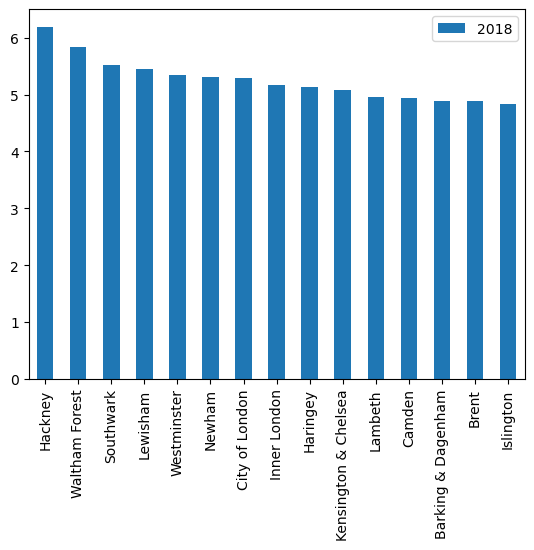

In [8]:
df_ratios.rename(columns={'index' : 'Borough', 0 : '2018'}, inplace = True)
top15 = df_ratios.sort_values(by = '2018', ascending = False).head(15)
ax = top15[['Borough', '2018']].plot(kind ='bar')
ax.set_xticklabels(top15.Borough)